In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape


(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

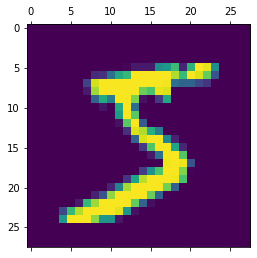

In [7]:
plt.matshow(X_train[0])


In [8]:
y_train[0]

5

In [9]:
#Scaling to improve the accuracy
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0] #all converted into 0 to 1


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #for flattening the array
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape


(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
#A simple neural network with no hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4673 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2666 - accuracy: 0.9255


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9265


[0.26598724722862244, 0.9265000224113464]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.9286832e-02, 5.0550528e-07, 8.2010448e-02, 9.5590258e-01,
       3.1248629e-03, 1.1795038e-01, 3.0084300e-06, 9.9986058e-01,
       1.2181386e-01, 7.4397516e-01], dtype=float32)

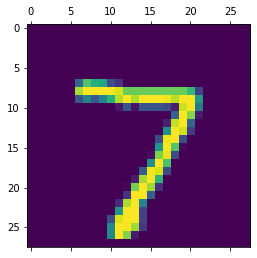

In [17]:
plt.matshow(X_test[0])

In [18]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

In [19]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    1,    0,    5,    6,    3,    1,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  926,   17,    8,    2,   13,   11,   39,    2],
       [   2,    0,   23,  918,    0,   23,    2,   12,   24,    6],
       [   2,    1,    5,    1,  910,    0,   10,    4,   10,   39],
       [   7,    3,    2,   33,   11,  769,   19,    6,   35,    7],
       [  11,    3,    6,    1,    7,    8,  917,    2,    3,    0],
       [   1,    5,   23,    5,    7,    0,    0,  948,    3,   36],
       [   6,    6,    7,   17,    9,   19,   10,   11,  882,    7],
       [  10,    7,    1,   10,   23,    5,    0,   21,    8,  924]])>

Text(69.0, 0.5, 'Truth')

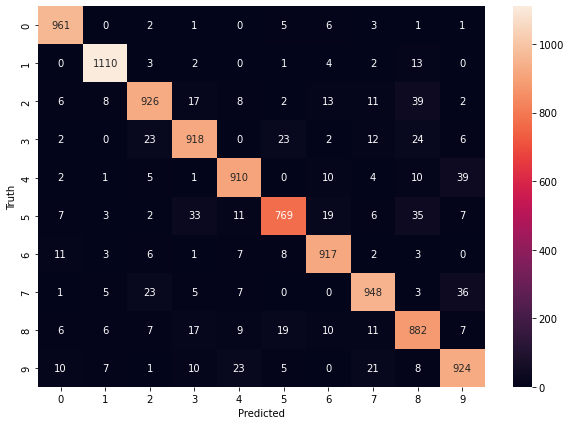

In [22]:
#heatmap to visuvalize the above array colourfully
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
#Now a neural network with hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2752 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1239 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9842


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9730


[0.08920393139123917, 0.9729999899864197]

Text(69.0, 0.5, 'Truth')

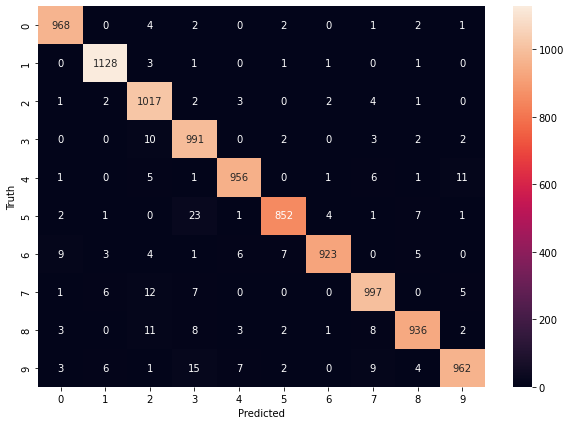

In [25]:
#Now we can see in the heatmap that the errors are decreasing
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
#we can flatten the array using flatten option while adding layers Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9245
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1212 - accuracy: 0.9642
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0852 - accuracy: 0.9744


In [27]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9704


[0.09685798734426498, 0.9703999757766724]